In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-asteroids-classification/nasa.csv
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2003-05-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2004-10-15.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2009-10-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2014-11-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file1996-12-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2009-10-15.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2014-09-15.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2006-06-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2008-03-08.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2012-08-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2009-0

# importing essential packages

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
import tensorflow.keras as keras

2024-07-23 02:47:51.396362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 02:47:51.396505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 02:47:51.553936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# loading the dataset

In [3]:
data = pd.read_csv('/kaggle/input/nasa-asteroids-classification/nasa.csv')
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


displaying general information about the datasets 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [5]:
data.shape

(4687, 40)

# data manipulation

checking for missing values

In [6]:
data.isna().any()

Neo Reference ID                False
Name                            False
Absolute Magnitude              False
Est Dia in KM(min)              False
Est Dia in KM(max)              False
Est Dia in M(min)               False
Est Dia in M(max)               False
Est Dia in Miles(min)           False
Est Dia in Miles(max)           False
Est Dia in Feet(min)            False
Est Dia in Feet(max)            False
Close Approach Date             False
Epoch Date Close Approach       False
Relative Velocity km per sec    False
Relative Velocity km per hr     False
Miles per hour                  False
Miss Dist.(Astronomical)        False
Miss Dist.(lunar)               False
Miss Dist.(kilometers)          False
Miss Dist.(miles)               False
Orbiting Body                   False
Orbit ID                        False
Orbit Determination Date        False
Orbit Uncertainity              False
Minimum Orbit Intersection      False
Jupiter Tisserand Invariant     False
Epoch Oscula

checking for duplicate values

In [7]:
data.duplicated().any()

False

column filtering

In [8]:
# as some columns in the dataset are same columns with different units
# so i am retaining the columns with S.I units and deleting the other columns

deletable_columns = ['Est Dia in KM(min)',
                     'Est Dia in KM(max)', 
                     'Est Dia in Miles(min)', 
                     'Est Dia in Miles(max)',
                     'Est Dia in Feet(min)',
                     'Est Dia in Feet(max)',
                     'Relative Velocity km per sec',
                     'Miss Dist.(miles)',
                     'Miss Dist.(Astronomical)',
                     'Miss Dist.(lunar)',
                     
]


In [9]:
data.drop(columns = deletable_columns, inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Neo Reference ID             4687 non-null   int64  
 1   Name                         4687 non-null   int64  
 2   Absolute Magnitude           4687 non-null   float64
 3   Est Dia in M(min)            4687 non-null   float64
 4   Est Dia in M(max)            4687 non-null   float64
 5   Close Approach Date          4687 non-null   object 
 6   Epoch Date Close Approach    4687 non-null   int64  
 7   Relative Velocity km per hr  4687 non-null   float64
 8   Miles per hour               4687 non-null   float64
 9   Miss Dist.(kilometers)       4687 non-null   float64
 10  Orbiting Body                4687 non-null   object 
 11  Orbit ID                     4687 non-null   int64  
 12  Orbit Determination Date     4687 non-null   object 
 13  Orbit Uncertainity

In [11]:
data.Equinox.value_counts()

Equinox
J2000    4687
Name: count, dtype: int64

In [12]:
data['Orbiting Body'].value_counts()

Orbiting Body
Earth    4687
Name: count, dtype: int64

 as both the above columns are same for every instance, delete the above two colum

In [13]:
data.drop(columns = ['Orbiting Body', 'Equinox'], inplace = True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Neo Reference ID             4687 non-null   int64  
 1   Name                         4687 non-null   int64  
 2   Absolute Magnitude           4687 non-null   float64
 3   Est Dia in M(min)            4687 non-null   float64
 4   Est Dia in M(max)            4687 non-null   float64
 5   Close Approach Date          4687 non-null   object 
 6   Epoch Date Close Approach    4687 non-null   int64  
 7   Relative Velocity km per hr  4687 non-null   float64
 8   Miles per hour               4687 non-null   float64
 9   Miss Dist.(kilometers)       4687 non-null   float64
 10  Orbit ID                     4687 non-null   int64  
 11  Orbit Determination Date     4687 non-null   object 
 12  Orbit Uncertainity           4687 non-null   int64  
 13  Minimum Orbit Inte

assumption : columns like 'neo reference id', 'name', 'orbitID', 'Close Approach Date', 'Orbit Determination Date' is not affecting the outcome

In [15]:
data.drop(columns = ['Neo Reference ID', 'Name', 'Close Approach Date', 'Orbit Determination Date', 'Orbit ID'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in M(min)            4687 non-null   float64
 2   Est Dia in M(max)            4687 non-null   float64
 3   Epoch Date Close Approach    4687 non-null   int64  
 4   Relative Velocity km per hr  4687 non-null   float64
 5   Miles per hour               4687 non-null   float64
 6   Miss Dist.(kilometers)       4687 non-null   float64
 7   Orbit Uncertainity           4687 non-null   int64  
 8   Minimum Orbit Intersection   4687 non-null   float64
 9   Jupiter Tisserand Invariant  4687 non-null   float64
 10  Epoch Osculation             4687 non-null   float64
 11  Eccentricity                 4687 non-null   float64
 12  Semi Major Axis              4687 non-null   float64
 13  Inclination       

# working with labels

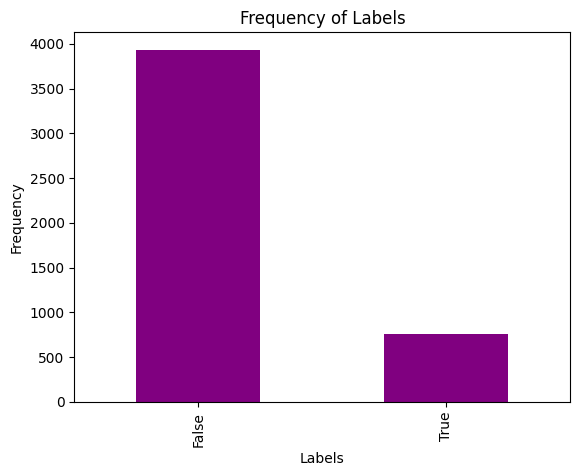

In [16]:
label_counts = data['Hazardous'].value_counts()

# Plot the bar chart
label_counts.plot(kind='bar', color = 'purple')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Frequency of Labels')
plt.show()

transforming the labels 

In [17]:
data['Hazardous'] = data['Hazardous'].apply(lambda x : 1 if x == True else 0)
data['Hazardous']

0       1
1       0
2       1
3       0
4       1
       ..
4682    0
4683    0
4684    0
4685    0
4686    0
Name: Hazardous, Length: 4687, dtype: int64

# visualizing columns

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in M(min)            4687 non-null   float64
 2   Est Dia in M(max)            4687 non-null   float64
 3   Epoch Date Close Approach    4687 non-null   int64  
 4   Relative Velocity km per hr  4687 non-null   float64
 5   Miles per hour               4687 non-null   float64
 6   Miss Dist.(kilometers)       4687 non-null   float64
 7   Orbit Uncertainity           4687 non-null   int64  
 8   Minimum Orbit Intersection   4687 non-null   float64
 9   Jupiter Tisserand Invariant  4687 non-null   float64
 10  Epoch Osculation             4687 non-null   float64
 11  Eccentricity                 4687 non-null   float64
 12  Semi Major Axis              4687 non-null   float64
 13  Inclination       

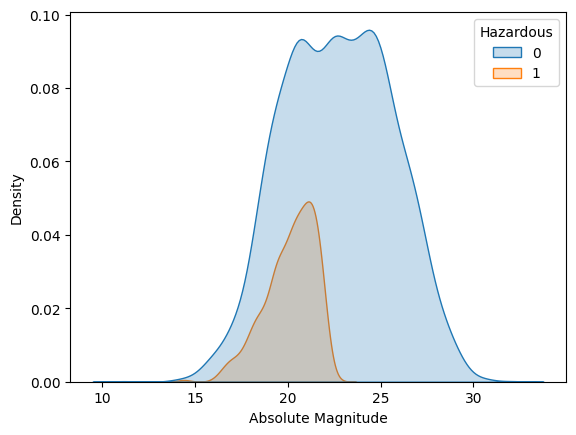

In [19]:
sns.kdeplot(data = data,x =  'Absolute Magnitude', hue = 'Hazardous', fill = True)
plt.show()

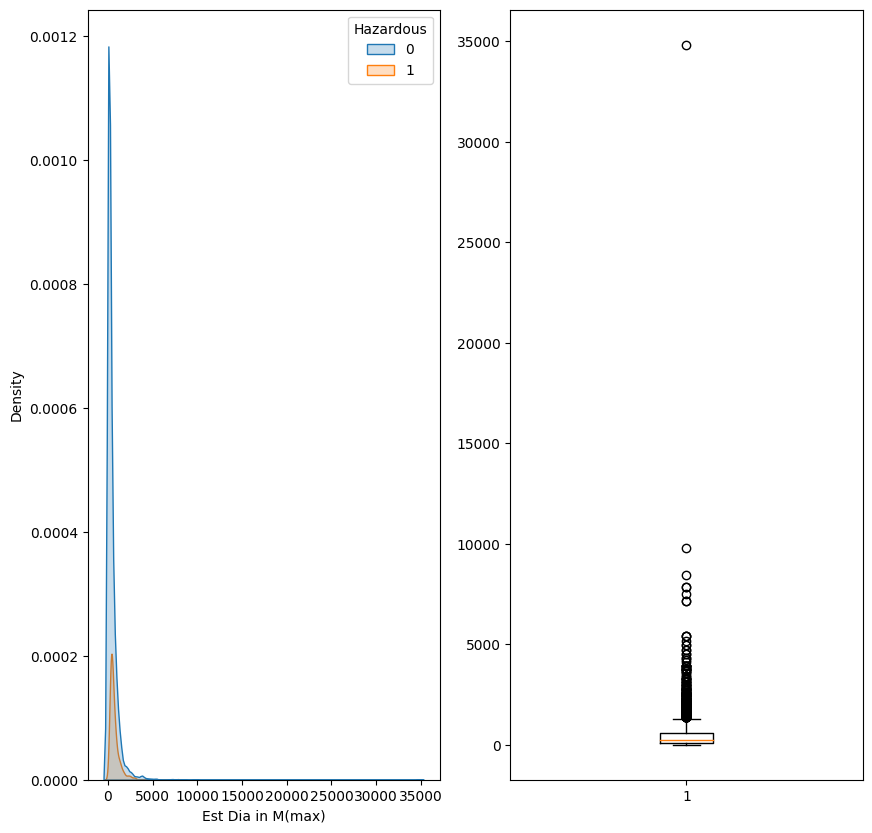

In [20]:
plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
sns.kdeplot(data = data,x =  'Est Dia in M(max)', hue = 'Hazardous', fill = True)
plt.subplot(1,2,2)
plt.boxplot(data['Est Dia in M(max)'])
plt.show()


<Axes: xlabel='Epoch Date Close Approach', ylabel='Density'>

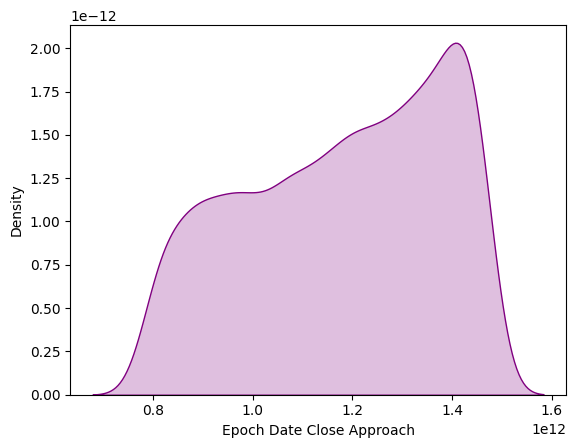

In [21]:
sns.kdeplot(data = data, x = 'Epoch Date Close Approach', fill = True, color = 'purple')

<Axes: xlabel='Relative Velocity km per hr', ylabel='Density'>

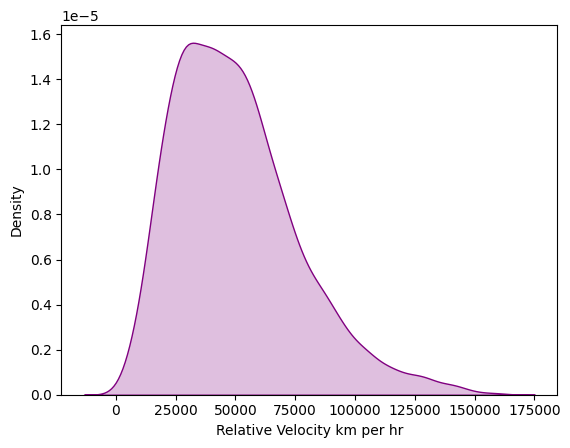

In [22]:
sns.kdeplot(data = data, x = 'Relative Velocity km per hr', fill = True, color = 'purple')

<Axes: xlabel='Miss Dist.(kilometers)', ylabel='Density'>

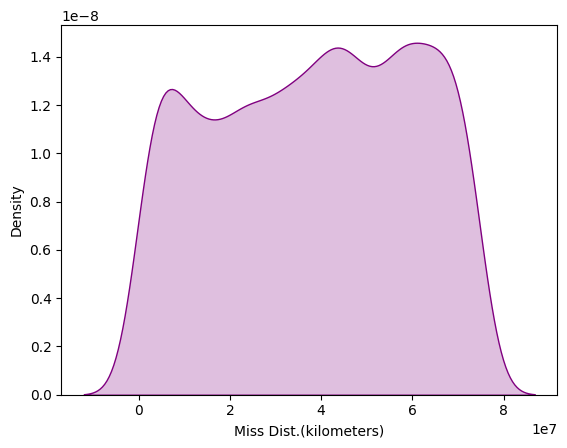

In [23]:
sns.kdeplot(data = data, x = 'Miss Dist.(kilometers)', fill = True, color = 'purple')

<Axes: xlabel='Orbit Uncertainity', ylabel='Density'>

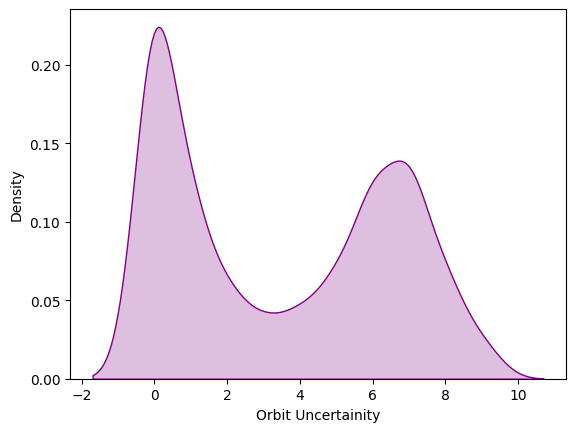

In [24]:
sns.kdeplot(data = data, x = 'Orbit Uncertainity', fill = True, color = 'purple')

<Axes: xlabel='Orbital Period', ylabel='Density'>

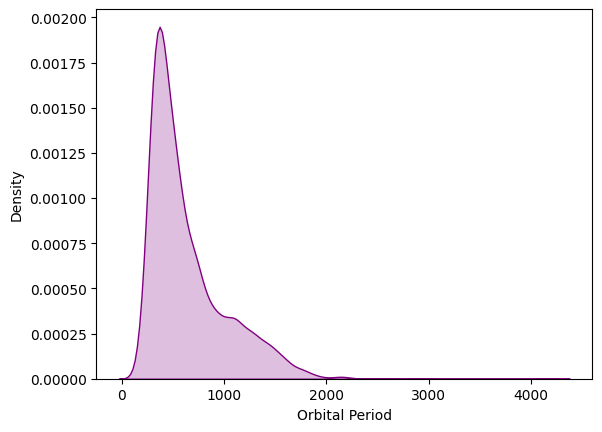

In [25]:
sns.kdeplot(data = data, x = 'Orbital Period', fill = True, color = 'purple')

<Axes: xlabel='Jupiter Tisserand Invariant', ylabel='Density'>

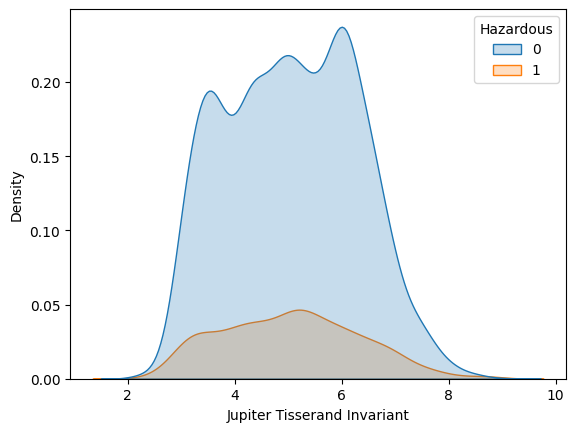

In [26]:
sns.kdeplot(data = data, x = 'Jupiter Tisserand Invariant', fill = True, color = 'purple', hue = 'Hazardous')

 similarly we can plot the distributions of all other variables

Text(0.5, 1.0, 'Correlation Heat Map')

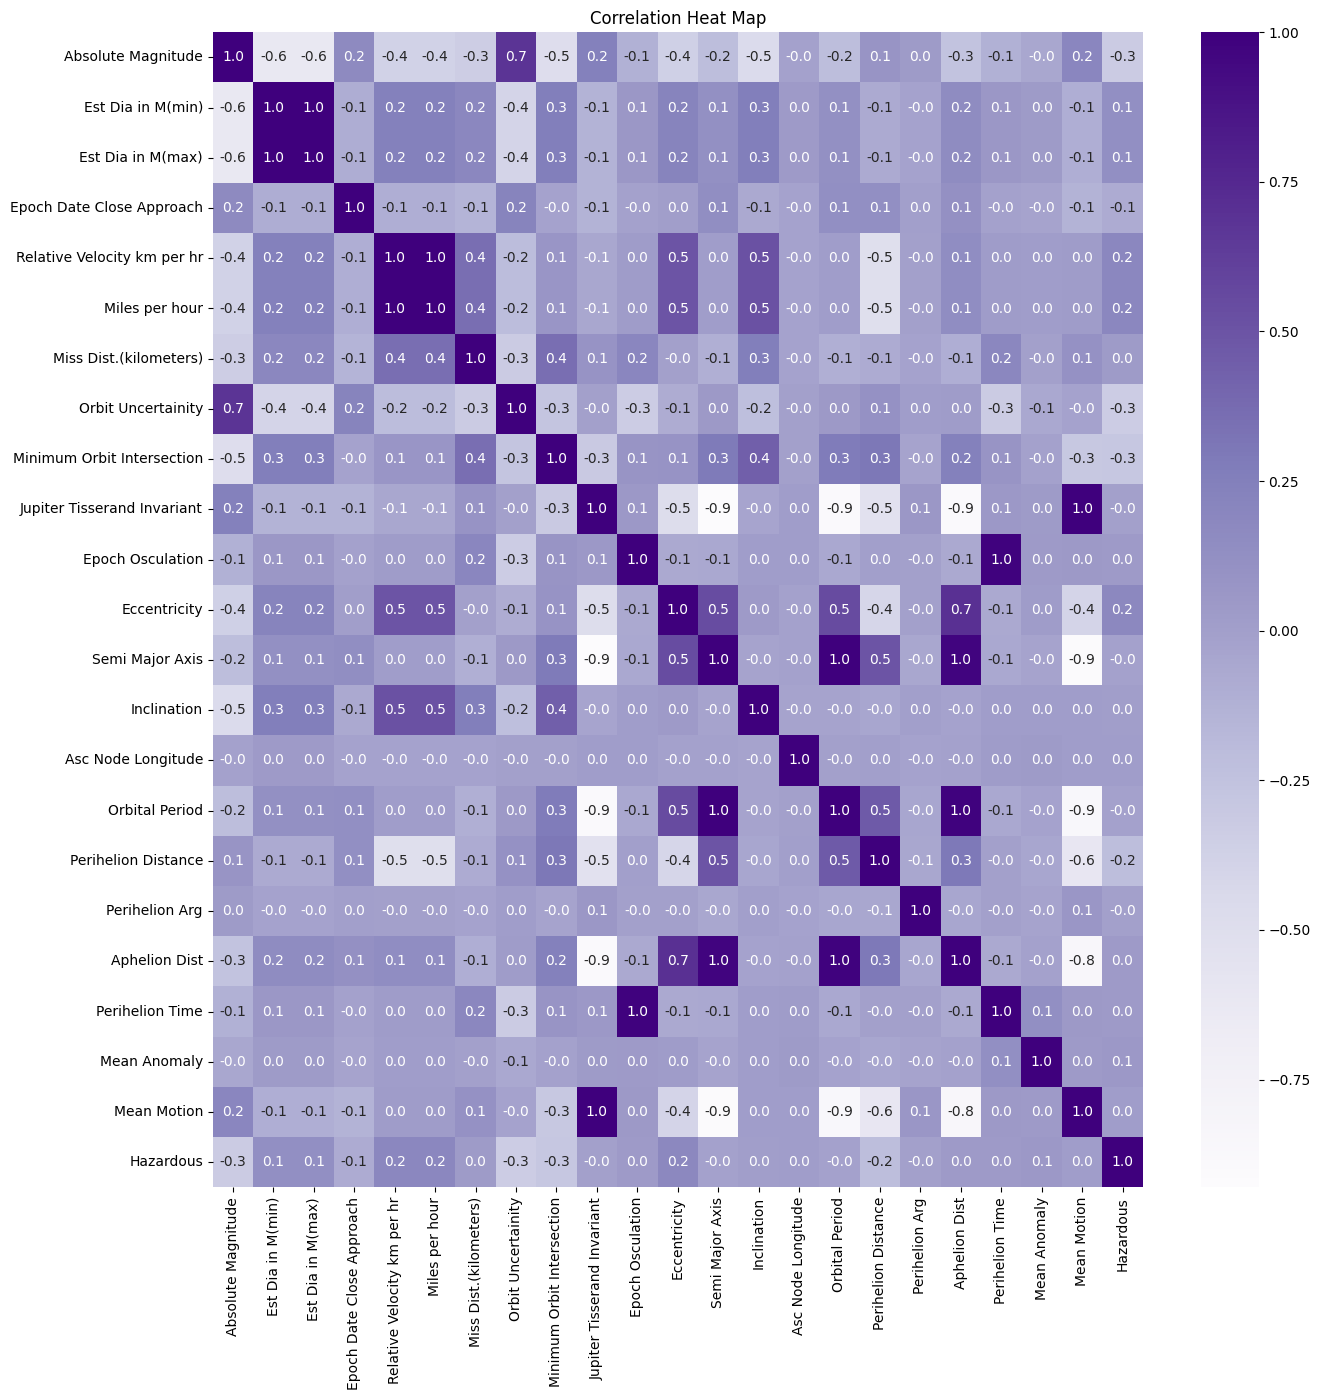

In [27]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap = 'Purples', annot = True, fmt = '.1f')
plt.title('Correlation Heat Map')

# splitting the data

In [28]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data, test_size = 0.15, stratify = data['Hazardous'], shuffle = True, random_state = 42)

In [29]:
train_data.shape

(3983, 23)

In [30]:
test_data.shape

(704, 23)

In [31]:
X_train = train_data
y_train = X_train['Hazardous']
X_train.drop('Hazardous', axis = 1, inplace = True)
(X_train.shape, y_train.shape)

((3983, 22), (3983,))

In [32]:
X_test = test_data
y_test = X_test['Hazardous']
X_test.drop('Hazardous', axis = 1, inplace = True)
(X_test.shape, y_test.shape)

((704, 22), (704,))

# creating the models

### Decision Tree Classifier

In [33]:
decision_clf = DecisionTreeClassifier(max_depth = 10)
decision_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [34]:
print(classification_report(y_test, decision_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       591
           1       1.00      0.97      0.99       113

    accuracy                           1.00       704
   macro avg       1.00      0.99      0.99       704
weighted avg       1.00      1.00      1.00       704



In [35]:
cm = confusion_matrix(y_test, decision_clf.predict(X_test))

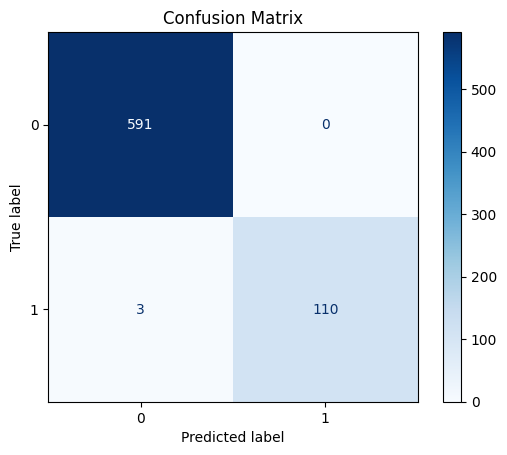

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_clf.classes_)
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix')
plt.show()


In [37]:
pd.Series(decision_clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)

Est Dia in M(min)              0.789146
Minimum Orbit Intersection     0.183205
Est Dia in M(max)              0.008615
Orbit Uncertainity             0.003619
Mean Anomaly                   0.002971
Mean Motion                    0.002936
Relative Velocity km per hr    0.002889
Perihelion Distance            0.001856
Epoch Date Close Approach      0.001801
Eccentricity                   0.001724
Miss Dist.(kilometers)         0.001238
Epoch Osculation               0.000000
Jupiter Tisserand Invariant    0.000000
Semi Major Axis                0.000000
Inclination                    0.000000
Asc Node Longitude             0.000000
Orbital Period                 0.000000
Perihelion Arg                 0.000000
Aphelion Dist                  0.000000
Perihelion Time                0.000000
Miles per hour                 0.000000
Absolute Magnitude             0.000000
dtype: float64

### Random Forest Classifier

In [38]:
rnd_clf = RandomForestClassifier(n_estimators = 300, max_depth = 10)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [39]:
y_test_pred = rnd_clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       591
           1       0.99      0.99      0.99       113

    accuracy                           1.00       704
   macro avg       0.99      0.99      0.99       704
weighted avg       1.00      1.00      1.00       704



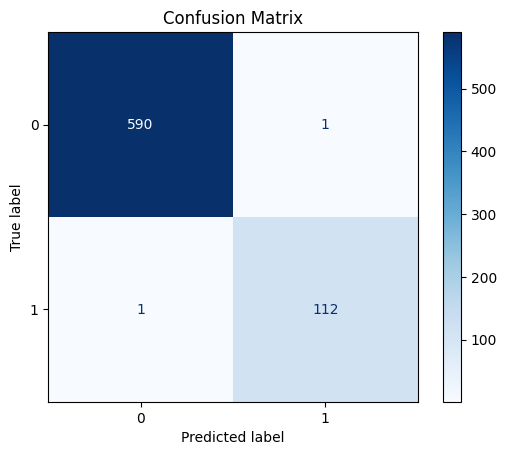

In [40]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_clf.classes_)
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix')
plt.show()


In [41]:
pd.Series(rnd_clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)

Minimum Orbit Intersection     0.441811
Est Dia in M(min)              0.109447
Absolute Magnitude             0.105812
Est Dia in M(max)              0.095728
Perihelion Distance            0.042272
Inclination                    0.040518
Orbit Uncertainity             0.037208
Miss Dist.(kilometers)         0.022040
Eccentricity                   0.012117
Relative Velocity km per hr    0.011552
Perihelion Arg                 0.010172
Aphelion Dist                  0.010107
Miles per hour                 0.009698
Semi Major Axis                0.007659
Mean Motion                    0.007473
Orbital Period                 0.007335
Jupiter Tisserand Invariant    0.007082
Mean Anomaly                   0.006184
Asc Node Longitude             0.005165
Perihelion Time                0.005152
Epoch Date Close Approach      0.004440
Epoch Osculation               0.001028
dtype: float64

## inference : from the above we can use the random forest classifier for inference